In [1]:
from sklearn.linear_model import (
    LinearRegression,
    RidgeCV,
    BayesianRidge,
    Ridge,
    ElasticNetCV,
    ElasticNet,
    Lasso,
    LassoCV,
    LarsCV,
    LassoLarsCV,
    SGDRegressor,
    TheilSenRegressor,
    RANSACRegressor,
)
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold, RepeatedKFold
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from pathlib import Path

INPUT_PATH = Path("/mnt/storage_dimm2/kaggle_data/commonlitreadabilityprize")
OUTPUT_PATH = Path("/mnt/storage_dimm2/kaggle_output/commonlitreadabilityprize")

In [2]:
model_folders = [
    # cherubic-nifty-serval - deberta-large - 0.4836
    "20210614-173633",
    "20210614-203831",
    "20210614-234025",
    "20210615-024138",
    "20210615-054256",
    # scrupulous-mink-of-amplitude - deberta-base - 0.4934
    "20210615-084357",
    "20210615-094729",
    "20210615-105329",
    "20210615-120001",
    "20210615-130640",
    # notorious-sticky-gibbon - roberta-base (with hidden) - 0.4961
    "20210615-220146",
    "20210615-225055",
    "20210615-234038",
    "20210616-003038",
    "20210616-012048",
    # fortunate-cherry-mandrill - roberta-large - 0.4890
    "20210616-021135",
    "20210616-041221",
    "20210616-060255",
    "20210616-075451",
    "20210616-094506",
    # mottled-certain-caracal - distilroberta-base - 0.5076
    "20210616-113626",
    "20210616-121203",
    "20210616-124738",
    "20210616-132341",
    "20210616-140300",
    # aspiring-classic-pegasus - funnel - 0.4975
    "20210617-083847", 
    "20210617-102611", 
    "20210617-120949", 
    "20210617-135233", 
    "20210617-153459", 
    # silver-bumblebee-of-attack - roberta-base - 0.4932
    "20210617-223340",
    "20210617-232650",
    "20210618-002022",
    "20210618-011405",
    "20210618-020751",
    # sloppy-resourceful-tanuki - albert-large - 0.5241
    "20210617-225903",
    "20210618-010302",
    "20210618-030706",
    "20210618-051049",
    "20210618-071437",
    # rustling-quirky-mastodon - bert-base-uncased - 0.5136
    "20210618-082756",
    "20210618-092115",
    "20210618-100526",
    "20210618-105909",
    "20210618-115253",
    # perky-defiant-husky - bert-large-uncased - 0.5287
    "20210618-124637",
    "20210618-144213",
    "20210618-163942",
    "20210618-183719",
    "20210618-203441",
    # gregarious-brass-perch - bart-base - 0.5445
    "20210618-223208",
    "20210618-233614",
    "20210619-004022",
    "20210619-014809",
    "20210619-025421",
    # military-firefly-of-apotheosis - bart-large - 0.5301
    "20210619-035747",
    "20210619-064351",
    "20210619-093050",
    "20210619-121916",
    "20210619-150740",
    # eccentric-lemur-of-tenacity - sentence-transformers/LaBSE - 0.5230
    "20210622-152356",
    "20210622-161822",
    "20210622-171312",
    "20210622-181238",
    "20210622-191326",
    # valiant-chameleon-of-chaos - sentence-transformers/bert-base-nli-cls-token - 0.5288
    "20210622-165808",
    "20210622-174555",
    "20210622-183427",
    "20210622-192221",
    "20210622-201127",
    # nonchalant-quaint-termite - roberta-base - 0.4951
    "20210623-093223",
    "20210623-101956",
    "20210623-110954",
    "20210623-120004",
    "20210623-125025",
    # skilled-smart-crane - deberta-large (new seeds) - 0.4758
    "20210623-105940",
    "20210623-140343",
    "20210623-170657",
    "20210623-201514",
    "20210623-232231",
    # winged-cerise-agouti - roberta-large - 0.4986
    "20210623-134115",
    "20210623-153240",
    "20210623-172217",
    "20210623-191151",
    "20210623-210342",
    # swift-of-amazing-pride - distilroberta-base - 0.5053
    "20210623-225426",
    "20210623-233019",
    "20210624-000706",
    "20210624-004429",
    "20210624-012102",
    # independent-discerning-earthworm - albert-large-v2
    "20210624-015812",
    "20210624-040309",
    "20210624-060838",
    "20210624-081317",
    "20210624-101855",
    # discreet-visionary-seahorse - microsoft/deberta-base - 0.5181
    "20210624-023057",
    "20210624-033624",
    "20210624-044356",
    "20210624-055212",
    "20210624-070123",
    # chirpy-wren-of-unity - funnel-transformer/large-base - 0.5000
    "20210624-081031",
    "20210624-095223",
    "20210624-113506",
    "20210624-131927",
    "20210624-150250",
    # armored-spectacular-bat - microsoft/deberta-large (KL Loss) - 0.4764
    "20210626-180337",
    "20210626-210855",
    "20210627-001342",
    "20210627-031838",
    "20210627-062345",
]

print(len(model_folders))

dataset_paths = [OUTPUT_PATH / f for f in model_folders]

110


In [3]:
mpaths, oof_paths = [], []
for p in dataset_paths:
    mpaths.append(sorted(list(p.glob(f"*/*/*.ckpt"))))
    oof_paths.extend(sorted(list(p.glob(f"*.csv"))))
    
len(model_folders), len(oof_paths)

(110, 110)

In [4]:
oofs = pd.read_csv(INPUT_PATH / "train.csv", usecols=["id", "target", "standard_error"]).sort_values(
        by="id"
    )
for i, (p, f) in enumerate(zip(oof_paths, model_folders)):
    x = pd.read_csv(p).sort_values(by="id")
    oofs[f] = x["prediction"].values

# pred_cols = [f"model_{i}" for i in range(len(mpaths))]
pred_cols = model_folders

print(len(pred_cols))
    
oofs.head()

110


,id,target,standard_error,20210614-173633,20210614-203831,20210614-234025,20210615-024138,20210615-054256,20210615-084357,20210615-094729,...,20210624-081031,20210624-095223,20210624-113506,20210624-131927,20210624-150250,20210626-180337,20210626-210855,20210627-001342,20210627-031838,20210627-062345
1279,000accf7e,-2.002055,0.497274,-2.174165,-2.305160,-2.451190,-2.505858,-2.490587,-2.264506,-2.664520,...,-2.236920,-2.195285,-2.268863,-2.183417,-2.121923,-2.388934,-2.229679,-2.272398,-2.320434,-2.338984
2185,001ef05a9,0.841000,0.492411,0.669889,0.569387,0.472606,0.514734,0.493645,0.528904,0.495011,...,0.245238,0.279476,0.676372,0.330868,0.207034,0.576178,0.415166,0.709367,0.527927,0.532325
332,00589d631,-2.195109,0.520239,-1.908255,-1.930197,-2.064695,-2.545308,-2.129548,-2.160540,-2.234235,...,-1.734213,-1.916465,-2.349501,-2.171746,-2.342350,-2.328293,-2.283333,-1.892142,-2.292147,-2.295439
72,0060c36b9,-1.333456,0.492384,-1.098570,-1.134784,-1.161226,-1.260594,-1.139692,-0.983574,-1.220255,...,-1.076815,-0.992014,-1.129593,-0.996934,-1.140424,-1.041155,-1.088255,-1.287997,-1.157498,-1.120583
2694,00d4d251d,0.088764,0.463817,-0.226934,-0.034609,-0.219147,-0.192564,0.082993,-0.454333,-0.133543,...,0.140961,0.228167,0.183794,-0.036221,0.030975,-0.053507,0.013755,-0.010445,0.144971,-0.004985


In [5]:
oofs.describe()

,target,standard_error,20210614-173633,20210614-203831,20210614-234025,20210615-024138,20210615-054256,20210615-084357,20210615-094729,20210615-105329,...,20210624-081031,20210624-095223,20210624-113506,20210624-131927,20210624-150250,20210626-180337,20210626-210855,20210627-001342,20210627-031838,20210627-062345
count,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,...,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000
mean,-0.959319,0.491435,-0.948092,-0.939186,-0.936123,-0.968496,-0.958907,-0.891844,-0.910382,-0.932254,...,-0.878059,-0.886871,-0.931421,-0.871524,-0.908374,-0.923585,-0.905506,-0.924195,-0.928184,-0.928492
std,1.033579,0.034818,0.912312,0.889185,0.913707,0.930968,0.905059,0.907261,0.927470,0.911461,...,0.911266,0.885822,0.895317,0.894591,0.890064,0.933771,0.895601,0.927191,0.924085,0.902648
min,-3.676268,0.000000,-3.560785,-3.392829,-3.732013,-3.534283,-3.483280,-3.612729,-3.607502,-3.599687,...,-3.310298,-3.678395,-3.506943,-3.460593,-3.440242,-3.692640,-3.831271,-3.865935,-3.516402,-3.386026
25%,-1.690320,0.468543,-1.613250,-1.570393,-1.616401,-1.659845,-1.625832,-1.550567,-1.581456,-1.592230,...,-1.559560,-1.538095,-1.597370,-1.545105,-1.553316,-1.625832,-1.541226,-1.588267,-1.597174,-1.604068
50%,-0.912190,0.484721,-0.900925,-0.891787,-0.904669,-0.926716,-0.913854,-0.845645,-0.853657,-0.858941,...,-0.845564,-0.820515,-0.882407,-0.820587,-0.880777,-0.872104,-0.851956,-0.860927,-0.886971,-0.862398
75%,-0.202540,0.506268,-0.242909,-0.258008,-0.232878,-0.260776,-0.254002,-0.191775,-0.206128,-0.229850,...,-0.160755,-0.194150,-0.237809,-0.165338,-0.205997,-0.207632,-0.230916,-0.203036,-0.204253,-0.236965
max,1.711390,0.649671,1.249225,1.150385,1.232993,1.288711,1.167053,1.241939,1.432130,1.164523,...,1.092831,0.933639,1.201950,1.092637,1.227185,1.409263,1.196018,1.145777,1.419107,1.312336


In [6]:
# oofs.loc[:, pred_cols].clip(oofs["target"].min(), oofs["target"].max(), inplace=True)

In [7]:
reg = RidgeCV(alphas=(0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50, 100, 500, 1000), normalize=False)
reg.fit(oofs[pred_cols], oofs["target"])
print(f"Best score: {np.sqrt(-reg.best_score_):0.5f}. Alpha {reg.alpha_}")
reg.coef_

Best score: 0.44926. Alpha 100.0


array([ 0.03301855, -0.03230306,  0.01271849, -0.00759677,  0.02544274,
       -0.02506119,  0.054553  , -0.03158701, -0.00269473, -0.01869266,
        0.00902017,  0.02552428,  0.03066821, -0.02697824,  0.01787889,
       -0.00099128,  0.07955329,  0.04091983,  0.03635086,  0.02251933,
        0.02026586, -0.02769381,  0.01299643,  0.03666539, -0.01120176,
        0.00960573,  0.03959265,  0.0391683 ,  0.06641659,  0.01303942,
        0.01893589,  0.02339384,  0.01255015, -0.0096394 , -0.01676745,
       -0.01451555,  0.03387564,  0.02725249,  0.01754422, -0.01584727,
        0.00691973,  0.03076252, -0.0055411 ,  0.02178557, -0.01451897,
        0.00837493, -0.00218715, -0.00762224, -0.02376656, -0.03292699,
        0.04646101, -0.00479386, -0.07791169, -0.03086702,  0.00181011,
       -0.07104343, -0.03540365,  0.00608524, -0.01809162, -0.00671716,
        0.03142793,  0.01727157,  0.01440773, -0.01950029,  0.0223069 ,
       -0.026901  , -0.01505369, -0.01310825,  0.00929768,  0.00

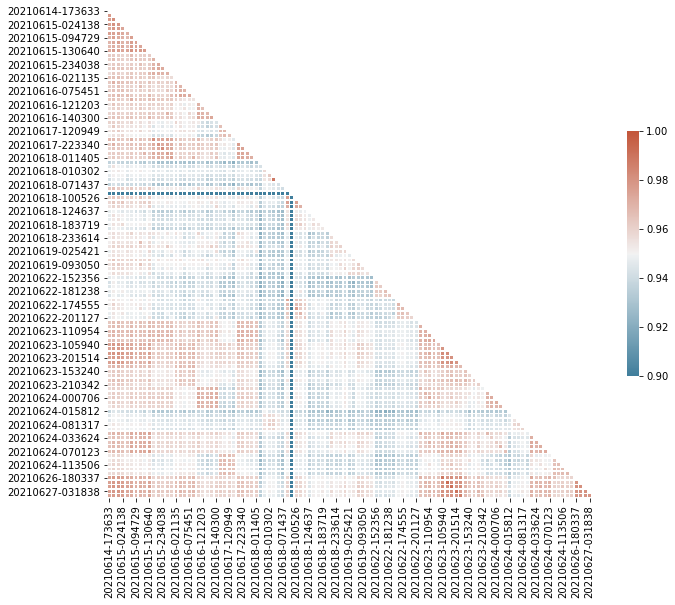

In [8]:
corr = oofs[pred_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=0.9, vmax=1.0, # center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

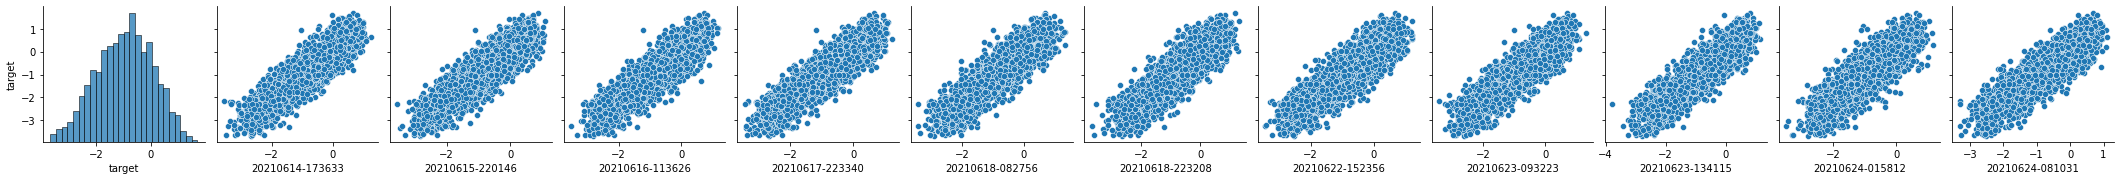

In [9]:
sns.pairplot(oofs, y_vars=["target"], x_vars=["target"] + pred_cols[::10]);

In [10]:
scores = cross_val_score(
#     LinearRegression(),
    Ridge(alpha=100),
#     KernelRidge(alpha=100, kernel="rbf"),
#     BaggingRegressor(n_estimators=100),
#     Lasso(),
    oofs[pred_cols],
    oofs["target"],
    scoring="neg_mean_squared_error",
#     cv=LeaveOneOut(),
    n_jobs=-1,
)
print(f"Best score: {np.sqrt(np.mean(-scores)):0.5f}")

Best score: 0.44854


In [11]:
# # reg = LassoCV(max_iter=5000, cv=LeaveOneOut(), n_jobs=-1)  # 0.45689
# reg = ElasticNetCV(l1_ratio=[0.01, 0.05, .1, .5, .7, .9, .95, .99, 1], max_iter=5000, n_jobs=-1, tol=1e-5)  # 0.45619

# reg.fit(oofs[pred_cols], oofs["target"])
# # print(f"Best score: {np.sqrt(reg.mse_path_[-1].mean()):0.5f}")
# print(reg.l1_ratio_)

# np.sqrt(reg.mse_path_[1, -1].mean())

# Brute force model selection

In [12]:
# def powerset(iterable):
#     "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
#     s = list(iterable)  # allows duplicate elements
#     return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))

# subsets = list(powerset(pred_cols))
# len(subsets)

In [13]:
# best_score = 10
# best_cols = None

# for s in tqdm(subsets[1:]):
#     reg = RidgeCV(alphas=(0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50, 100, 500, 1000))
#     reg.fit(oofs[list(s)], oofs["target"])
#     score = np.sqrt(-reg.best_score_)
    
#     if score < best_score:
#         best_score = score
#         best_cols = list(s)
        
# print(f"Best score: {best_score:0.5f}")
# print("Best cols", best_cols)

In [14]:
# ['model_1', 'model_2', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'model_9', 'model_11', 'model_13', 'model_16']

# Hill climbing

In [15]:
def get_score(X, y):
    #     reg = RidgeCV(alphas=(0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50, 100, 500, 1000), normalize=True)
    #     reg.fit(X, y)
    #     return np.sqrt(-reg.best_score_)
    reg = LassoCV(
        max_iter=5000,
        random_state=48,
        n_jobs=-1,
        normalize=True,
#         cv=RepeatedKFold(random_state=48),
    ).fit(X, y)
    return np.sqrt(reg.mse_path_)[-1].mean()


def averaging(X, y):
    y_pred = X.mean(1)
    return np.sqrt(mean_squared_error(y_pred, y))

In [16]:
def get_size(folder):
    # Ubuntu uses 1000**3, Kaggle use 1024**3
    return sum(f.stat().st_size for f in (OUTPUT_PATH / folder).rglob('*') if f.is_file()) / 1024**3

In [17]:
candidates = model_folders.copy()

best_score = np.inf
selection = []
# tol = 0.00001
tol = 0
y = oofs["target"]
storage = 0

# Find best initial model
initial_scores = [np.sqrt(mean_squared_error(oofs[c], oofs["target"])) for c in candidates]
idx = np.argmin(initial_scores)
best_score = initial_scores[idx]
selection.append(candidates[idx])
storage += get_size(candidates[idx])
print(f"Initial {candidates[idx]}. Score {best_score:0.5f}. {storage:0.1f} GB")
del candidates[idx]


while storage < 120:
    scores = [get_score(oofs[selection + [c]], y) for c in candidates]

    idx = np.argmin(scores)
    if scores[idx] < best_score - tol:
        best_score = scores[idx]
        selection.append(candidates[idx])
        storage += get_size(candidates[idx])
        print(f"Added {candidates[idx]}. New best score {best_score:0.5f}. {storage:0.1f} GB")
        del candidates[idx]
    else:
        break
        
print(len(selection), "models selected")
        
selection

Initial 20210623-232231. Score 0.47171. 7.6 GB
Added 20210616-041221. New best score 0.45762. 14.2 GB
Added 20210617-135233. New best score 0.45364. 20.9 GB
Added 20210624-012102. New best score 0.45147. 22.5 GB
Added 20210619-004022. New best score 0.45058. 25.1 GB
Added 20210624-113506. New best score 0.44959. 31.8 GB
Added 20210615-234038. New best score 0.44890. 34.2 GB
Added 20210619-035747. New best score 0.44836. 41.8 GB
Added 20210624-101855. New best score 0.44769. 42.2 GB
Added 20210618-223208. New best score 0.44719. 44.8 GB
Added 20210624-015812. New best score 0.44681. 45.2 GB
Added 20210618-092115. New best score 0.44649. 46.8 GB
Added 20210616-060255. New best score 0.44619. 53.5 GB
Added 20210624-150250. New best score 0.44601. 60.2 GB
Added 20210623-201514. New best score 0.44583. 67.8 GB
Added 20210618-203441. New best score 0.44562. 74.0 GB
Added 20210624-044356. New best score 0.44549. 76.6 GB
Added 20210615-094729. New best score 0.44534. 79.2 GB
Added 20210614-203

['20210623-232231',
 '20210616-041221',
 '20210617-135233',
 '20210624-012102',
 '20210619-004022',
 '20210624-113506',
 '20210615-234038',
 '20210619-035747',
 '20210624-101855',
 '20210618-223208',
 '20210624-015812',
 '20210618-092115',
 '20210616-060255',
 '20210624-150250',
 '20210623-201514',
 '20210618-203441',
 '20210624-044356',
 '20210615-094729',
 '20210614-203831',
 '20210623-170657',
 '20210622-152356',
 '20210615-084357',
 '20210627-062345',
 '20210616-132341',
 '20210626-210855']

# Netflix method

https://kaggler.readthedocs.io/en/latest/_modules/kaggler/ensemble/linear.html#netflix

https://www.netflixprize.com/assets/GrandPrize2009_BPC_BigChaos.pdf

In [18]:
# https://kaggler.readthedocs.io/en/latest/_modules/kaggler/ensemble/linear.html#netflix
def netflix(es, ps, e0, l=.0001):
    """Combine predictions with the optimal weights to minimize RMSE.

    Ref: Töscher, A., Jahrer, M., & Bell, R. M. (2009). The bigchaos solution to the netflix grand prize.

    Args:
        es (list of float): RMSEs of predictions
        ps (list of np.array): predictions
        e0 (float): RMSE of all zero prediction
        l (float): lambda as in the ridge regression

    Returns:
        (tuple):

            - (np.array): ensemble predictions
            - (np.array): weights for input predictions
    """
    m = len(es)
    n = len(ps[0])

    X = np.stack(ps).T
    pTy = .5 * (n * e0**2 + (X**2).sum(axis=0) - n * np.array(es)**2)

    w = np.linalg.pinv(X.T.dot(X) + l * n * np.eye(m)).dot(pTy)

    return X.dot(w), w

In [19]:
preds = [oofs[c].values for c in selection[:20]]
rmses = [np.sqrt(mean_squared_error(p, oofs["target"])) for p in preds]

In [20]:
kf = KFold(5, shuffle=True, random_state=48)

for i in range(-8, 1):
    scores = []
    for fold, (trn_idx, val_idx) in enumerate(kf.split(oofs)):
        train_oofs = oofs.loc[trn_idx]
        valid_oofs = oofs.loc[val_idx]

        train_preds = [train_oofs[c].values for c in selection[:20]]    
        _, weights = netflix(rmses, train_preds, 1.4100, 10**i)

        val_pred = valid_oofs[selection[:20]] @ weights
        score = np.sqrt(mean_squared_error(val_pred, valid_oofs["target"]))
        scores.append(score)
        # print(f"Fold {fold}, RMSE: {score:0.5f}")

    print(f"L: {10**i}, Final RMSE: {np.mean(scores):0.5f}")

L: 1e-08, Final RMSE: 0.44280
L: 1e-07, Final RMSE: 0.44280
L: 1e-06, Final RMSE: 0.44280
L: 1e-05, Final RMSE: 0.44280
L: 0.0001, Final RMSE: 0.44280
L: 0.001, Final RMSE: 0.44280
L: 0.01, Final RMSE: 0.44325
L: 0.1, Final RMSE: 0.44873
L: 1, Final RMSE: 0.45769


# Netflix hillclimb

In [21]:
def get_nf_score(X, y):
    kf = KFold(5, shuffle=True, random_state=48)
    
    scores = []
    for fold, (trn_idx, val_idx) in enumerate(kf.split(X)):
        train_oofs = X.loc[trn_idx]
        valid_oofs = X.loc[val_idx]
        valid_target = y.loc[val_idx]

        train_preds = [train_oofs[c].values for c in X.columns]    
        rmses = [np.sqrt(mean_squared_error(X[c], y)) for c in X.columns]
        _, weights = netflix(rmses, train_preds, 1.4100)

        val_pred = valid_oofs @ weights
        score = np.sqrt(mean_squared_error(val_pred, valid_target))
        scores.append(score)

    return np.mean(scores)

In [22]:
candidates = model_folders.copy()

best_score = np.inf
selection = []
tol = 0
y = oofs["target"]
storage = 0

# Find best initial model
initial_scores = [np.sqrt(mean_squared_error(oofs[c], oofs["target"])) for c in candidates]
idx = np.argmin(initial_scores)
best_score = initial_scores[idx]
selection.append(candidates[idx])
storage += get_size(candidates[idx])
print(f"Initial {candidates[idx]}. Score {best_score:0.5f}. {storage:0.1f} GB")
del candidates[idx]


while storage < 120:
    scores = [get_nf_score(oofs[selection + [c]], y) for c in candidates]

    idx = np.argmin(scores)
    if scores[idx] < best_score - tol:
        best_score = scores[idx]
        selection.append(candidates[idx])
        storage += get_size(candidates[idx])
        print(f"Added {candidates[idx]}. New best score {best_score:0.5f}. {storage:0.1f} GB")
        del candidates[idx]
    else:
        break
        
print(len(selection), "models selected")
selection

Initial 20210623-232231. Score 0.47171. 7.6 GB
Added 20210616-041221. New best score 0.45918. 14.2 GB
Added 20210617-135233. New best score 0.45410. 20.9 GB
Added 20210624-012102. New best score 0.45158. 22.5 GB
Added 20210619-004022. New best score 0.45018. 25.1 GB
Added 20210624-101855. New best score 0.44894. 25.5 GB
Added 20210615-234038. New best score 0.44803. 27.9 GB
Added 20210624-113506. New best score 0.44728. 34.6 GB
Added 20210619-035747. New best score 0.44639. 42.2 GB
Added 20210618-223208. New best score 0.44560. 44.8 GB
Added 20210623-201514. New best score 0.44505. 52.4 GB
Added 20210624-015812. New best score 0.44444. 52.8 GB
Added 20210624-044356. New best score 0.44408. 55.4 GB
Added 20210615-094729. New best score 0.44366. 58.0 GB
Added 20210624-150250. New best score 0.44332. 64.7 GB
Added 20210618-183719. New best score 0.44302. 70.9 GB
Added 20210622-152356. New best score 0.44275. 79.8 GB
Added 20210614-203831. New best score 0.44247. 87.4 GB
Added 20210615-084

['20210623-232231',
 '20210616-041221',
 '20210617-135233',
 '20210624-012102',
 '20210619-004022',
 '20210624-101855',
 '20210615-234038',
 '20210624-113506',
 '20210619-035747',
 '20210618-223208',
 '20210623-201514',
 '20210624-015812',
 '20210624-044356',
 '20210615-094729',
 '20210624-150250',
 '20210618-183719',
 '20210622-152356',
 '20210614-203831',
 '20210615-084357',
 '20210614-173633',
 '20210618-010302',
 '20210623-125025',
 '20210622-174555',
 '20210622-191326',
 '20210616-075451',
 '20210623-110954']

In [23]:
model_folders_current = [
    "20210623-232231",
    "20210616-041221",
    "20210617-135233",
    "20210624-012102",
    "20210619-004022",
    "20210624-113506",
    "20210615-234038",
    "20210619-035747",
    "20210624-101855",
    "20210618-223208",
    "20210624-015812",
    "20210618-092115",
    "20210616-060255",
    "20210624-150250",
    "20210623-201514",
    "20210618-203441",
    "20210624-044356",
    "20210615-094729",
    "20210614-203831",
    "20210623-170657",
    "20210622-152356",
    "20210615-084357",
    "20210616-132341",
    "20210619-014809",
    "20210615-105329",
    "20210618-010302",
]


model_folders_new = [
    "20210623-232231",
    "20210616-041221",
    "20210617-135233",
    "20210624-012102",
    "20210619-004022",
    "20210624-101855",
    "20210615-234038",
    "20210624-113506",
    "20210619-035747",
    "20210618-223208",
    "20210623-201514",
    "20210624-015812",
    "20210624-044356",
    "20210615-094729",
    "20210624-150250",
    "20210618-183719",
    "20210622-152356",
    "20210614-203831",
    "20210615-084357",
    "20210614-173633",
    "20210618-010302",
    "20210623-125025",
    "20210622-174555",
    "20210622-191326",
    "20210616-075451",
    "20210623-110954",
]

model_folders_current = set(model_folders_current)
model_folders_new = set(model_folders_new)

In [24]:
# Add these
model_folders_new.difference(model_folders_current)

{'20210614-173633',
 '20210616-075451',
 '20210618-183719',
 '20210622-174555',
 '20210622-191326',
 '20210623-110954',
 '20210623-125025'}

In [25]:
# Remove these
model_folders_current.difference(model_folders_new)

{'20210615-105329',
 '20210616-060255',
 '20210616-132341',
 '20210618-092115',
 '20210618-203441',
 '20210619-014809',
 '20210623-170657'}